this script explores the difference between plot1 that shows funding is single country dominated with new plot shows funding is important to African countries

In [115]:
import pandas as pd
import seaborn as sns
import geopandas as gp
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [2]:
pubs_path="../../data/nf_folder/Data/DerivedData/CleanedRawData/pub.pkl"
region_path="../../data/nf_folder/Data/AdditionalData/cntry_region.xlsx"

In [3]:
pub_df=pd.read_pickle(pubs_path)
pub_df.head()

,id,year,dis,type,author,funder,author_distinct,funder_distinct,funded,IntCol,cofund,intfund
0,60694041,2017,9,1,"[Canada, United States]","[United States, United States]","[United States, Canada]",[United States],1,1,0,0
1,48573156,2012,89,1,[France],Not-Funded,[France],Not-Funded,0,0,0,0
2,55323671,2015,89,1,"[France, Chile]","[Chile, Chile, Chile, Chile, Chile]","[Chile, France]",[Chile],1,1,0,0
3,57633115,2016,31,1,"[Switzerland, United States]",[Switzerland],"[Switzerland, United States]",[Switzerland],1,1,0,0
4,64831413,2018,99,1,[China],"[China, China, China, China, China, China]",[China],[China],1,0,0,0


In [20]:
pub_df.head(2)

,id,year,dis,type,author,funder,author_distinct,funder_distinct,funded,IntCol,cofund,intfund
0,60694041,2017,9,1,"[Canada, United States]","[United States, United States]","[United States, Canada]",[United States],1,1,0,0
1,48573156,2012,89,1,[France],Not-Funded,[France],Not-Funded,0,0,0,0


In [59]:
author_df=pub_df[['id','year','author_distinct','author_distinct','funder_distinct','IntCol','funded','cofund']]
author_df.columns=['id','year','author_distinct','authors','funder_distinct','IntCol','funded','cofund']
author_df=author_df.explode('author_distinct')

In [8]:
region=pd.read_excel(region_path)
region=region[['cntry','region2']]
region=region.rename(columns={'region2':'region'})
region.head()

,cntry,region
0,Algeria,Africa
1,Angola,Africa
2,Belgian Congo,Africa
3,Benin,Africa
4,Botswana,Africa


In [60]:
author_df=author_df.merge(region,left_on='author_distinct',right_on='cntry')

In [31]:
def assign(fund,cofund):
    if fund==0:
        return 'not'
    elif fund==1 and cofund==0:
        return 'single'
    else:
        return 'mul'


<ipython-input-31-bed48d17b4a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af['type']=af.apply(lambda x:assign(x.funded,x.cofund),axis=1)


In [62]:
af = author_df[author_df.region=='Africa']
af['type']=af.apply(lambda x:assign(x.funded,x.cofund),axis=1)
res1 = af.groupby(['cntry','type']).size().reset_index(name='count')
res1 = res1.pivot_table(index='cntry',columns='type',values='count')

<ipython-input-62-72ef20227de5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af['type']=af.apply(lambda x:assign(x.funded,x.cofund),axis=1)


In [43]:
def assign_type(acntry,funders):
    t='null'
    if funders=='Not-Funded':
        t='Not-Funded'
    elif len(funders)==1 and funders[0]==acntry: #if the author country is the only one funder of the pub
        t='Domestic'
    elif acntry in funders:
        t='Co-Fund'
    else:
        t='Foreign'
    return t

In [44]:
af.head()

,id,year,author_distinct,funder_distinct,IntCol,funded,cofund,cntry,region,type
12532463,54397031,2015,South Africa,[South Africa],0,1,0,South Africa,Africa,single
12532464,62976513,2018,South Africa,[Germany],1,1,0,South Africa,Africa,single
12532465,61838962,2017,South Africa,"[United States, South Korea]",1,1,1,South Africa,Africa,mul
12532466,52214946,2014,South Africa,[South Korea],0,1,0,South Africa,Africa,single
12532467,59554472,2017,South Africa,Not-Funded,1,0,0,South Africa,Africa,not


In [63]:
af['type2']=af.apply(lambda x: assign_type(x.author_distinct,x.funder_distinct),axis=1)

<ipython-input-63-857ecaa00e44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af['type2']=af.apply(lambda x: assign_type(x.author_distinct,x.funder_distinct),axis=1)


In [64]:
res2=af.groupby(['cntry','type2']).size().reset_index(name='count')
res2 = res2.pivot_table(index='cntry',columns='type2',values='count')

In [69]:
res2[10:15]

type2,Co-Fund,Domestic,Foreign,Not-Funded
cntry,,,,
Comoros,NaN,NaN,37.0,19.0
Congo,32.0,23.0,1435.0,1040.0
Djibouti,2.0,5.0,39.0,58.0
Egypt,2027.0,3875.0,20840.0,60603.0
Equatorial Guinea,7.0,1.0,24.0,19.0


In [70]:
res1[10:15]

type,mul,not,single
cntry,,,
Comoros,19,19,18
Congo,510,1040,980
Djibouti,10,58,36
Egypt,6035,60603,20707
Equatorial Guinea,12,19,20


In [74]:
author_df.head()

,id,year,author_distinct,authors,funder_distinct,IntCol,funded,cofund,cntry,region
0,60694041,2017,United States,"[United States, Canada]",[United States],1,1,0,United States,North America
1,57633115,2016,United States,"[Switzerland, United States]",[Switzerland],1,1,0,United States,North America
2,45958559,2010,United States,[United States],[United States],0,1,0,United States,North America
3,32074801,2009,United States,[United States],Not-Funded,0,0,0,United States,North America
4,32879259,2009,United States,[United States],[United States],0,1,0,United States,North America


In [79]:
f=author_df.groupby(['author_distinct','region','funded']).size().reset_index(name='count')

In [82]:
f=f.pivot(index=['author_distinct','region'],columns='funded',values='count')

In [86]:
f=f.div(f.sum(axis=1), axis=0).reset_index()

In [96]:
f.columns=['cntry','region','not','fund']
f

,cntry,region,not,fund
0,Afghanistan,Asia,0.551378,0.448622
1,Albania,Other Europe,0.742275,0.257725
2,Algeria,Africa,0.772406,0.227594
3,Andorra,Other Europe,0.492754,0.507246
4,Angola,Africa,0.400415,0.599585
...,...,...,...,...
200,Venezuela,South America,0.583946,0.416054
201,Vietnam,Asia,0.310601,0.689399
202,Yemen,Asia,0.587252,0.412748
203,Zambia,Africa,0.302500,0.697500


<AxesSubplot:xlabel='region', ylabel='fund'>

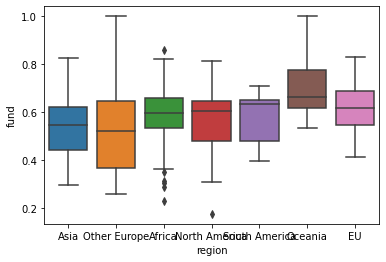

In [110]:
sns.boxplot(data=f,x='region',y='fund')

In [122]:
mannwhitneyu(f[f.region=='Asia']['fund'].values.tolist(),f[f.region=='Africa']['fund'].values.tolist())


MannwhitneyuResult(statistic=1002.0, pvalue=0.04882256779584756)

In [99]:
def plot_worldmap(ax, fig, basemap, data, plotcolumn, cmap, vmin, vmax,legend_title):
    """plot a basemap and color the country based on the column passed into
    """

    basemap.plot(ax=ax, linewidth=0.25, edgecolor="#8C8C8C", facecolor="#ffffff")
    data.plot(column=plotcolumn, cmap=cmap, vmin=vmin, vmax=vmax, ax=ax)
    ax.axis("off")
    
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="2%", pad=0.05)
    #sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    #sm._A = []
    #clb = fig.colorbar(sm, cax=cax)
    #clb.ax.set_title(legend_title)
    return fig, ax

In [103]:
world_geo=gp.read_file("../../data/nf_folder/Data/AdditionalData/world_map_shp/ne_50m_admin_0_countries.shp")

In [104]:
world_geo=gp.read_file("../../data/nf_folder/Data/AdditionalData/world_map_shp/ne_50m_admin_0_countries.shp")
world_geo=world_geo[['WoS','Code','geometry']]
world_geo=world_geo[world_geo.WoS!='Antarctica']
world_geo.head()

,WoS,Code,geometry
0,Zimbabwe,ZWE,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,ZMB,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,YEM,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,VNM,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,VEN,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


(<Figure size 720x576 with 1 Axes>, <AxesSubplot:>)

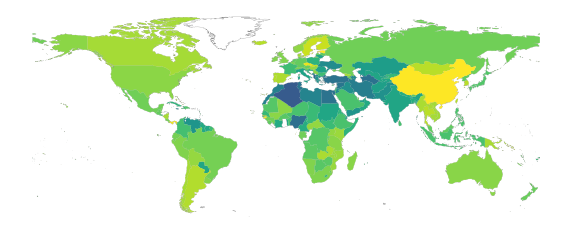

In [109]:
fig, ax=plt.subplots(figsize=(10,8))
plot_data=world_geo.merge(f,left_on='WoS',right_on='cntry')
plot_data=gp.GeoDataFrame(plot_data)
plot_worldmap(ax, fig, world_geo, plot_data, 'fund','viridis',0.0,0.8,'Proportion')
